# Projet de Deep Learning: 
## Momentum Contrast for Unsupervised Visual Representation Learning

George Bejinariu


In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models

import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
!pip install -q pytorch-metric-learning[with-hooks]

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  
num_classes = 10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
import numpy as np

In [ ]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
#MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000, 10)
X_test:  (10000, 28, 28)
Y_test:  (10000, 10)


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NB_LABELED = 100 
INPUT_SHAPE = 128 
HEIGHT = 28
WIDTH = 28



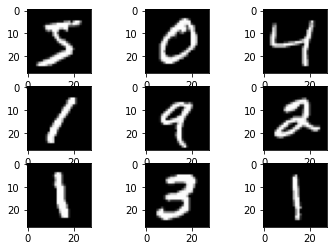

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

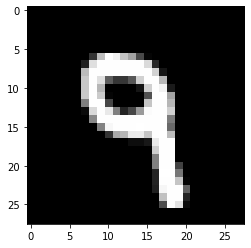

The label is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
i = 20111
#pyplot.subplot(330 + 1 + 0)
pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()
label = Y_train[i]
print("The label is ", label)

In [ ]:
### Normalisation des images :
def normalize_img(img):
    img = img.astype('float32')/255.0 
    img = (img - 0.5)/0.5
    return img

def denormalize_img(img):
    img = (img*0.5+0.5)*255.0
    return img.astype('uint8')

def get_data(start_index, end_index , X_train):
    NUM_SAMPLES = end_index - start_index
    x_batch = X_train[start_index:end_index]
    z_noise = np.random.uniform(-1,1,INPUT_SHAPE * NUM_SAMPLES).reshape((NUM_SAMPLES,INPUT_SHAPE))
    return x_batch,z_noise

# Récupérer les données
X_train = np.expand_dims(X_train , axis = -1).astype('uint8')
X_test = np.expand_dims(X_test , axis = -1).astype('uint8')

X_train = normalize_img(X_train)
X_test = normalize_img(X_test)

In [ ]:
input_shape = (28, 28, 1)
tf.keras.backend.clear_session()
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train[:100], Y_train[:100], epochs=30, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 90ms/step - loss: 2.3470 - accuracy: 0.0875 - val_loss: 2.2207 - val_accuracy: 0.2000
Epoch 2/30
3/3 [==============================] - 0s 18ms/step - loss: 2.2174 - accuracy: 0.2250 - val_loss: 2.1446 - val_accuracy: 0.4000
Epoch 3/30
3/3 [==============================] - 0s 15ms/step - loss: 2.0956 - accuracy: 0.3750 - val_loss: 2.0503 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 15ms/step - loss: 2.0144 - accuracy: 0.4125 - val_loss: 1.9636 - val_accuracy: 0.5500
Epoch 5/30
3/3 [==============================] - 0s 15ms/step - loss: 1.9292 - accuracy: 0.4875 - val_loss: 1.8740 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 1.7693 - accuracy: 0.5750 - val_loss: 1.7719 - val_accuracy: 0.6000
Epoch 7/30
3/3 [==============================] - 0s 24ms/step - loss: 1.6513 - accuracy: 0.6000 - val_loss: 1.6523 - val_accuracy: 0.6500
Epoch 8/30
3/3 [======================

Text(0.5, 1.0, 'accuracy')

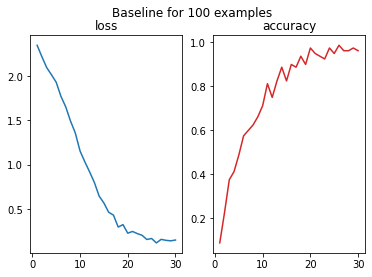

In [ ]:

import matplotlib.pylab as plt

lists = history.history.items()
x_keys,y_vals = zip(*lists)
x_epochs = np.arange(1,31)
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('Baseline for 100 examples')
ax1.plot(x_epochs, y_vals[0])
ax1.set_title(x_keys[0])
ax2.plot(x_epochs, y_vals[1], "tab:red")
ax2.set_title(x_keys[1])

In [ ]:
#prediction sur x test
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.927341878414154
Test accuracy: 0.7167999744415283


In [ ]:
import logging
import os
import random
from functools import partial

import record_keeper
import torch
from PIL import ImageFilter

from torchvision import datasets, transforms
from torchvision.models import resnet
from tqdm import tqdm

from pytorch_metric_learning import losses
from pytorch_metric_learning.utils import logging_presets

logging.getLogger().setLevel(logging.INFO)

device = torch.device("cuda")

######################
### from MoCo repo ###
######################
class TwoCropsTransform:
    """Take two random crops of one image as the query and key."""

    def __init__(self, base_transform):
        self.base_transform = base_transform

    def __call__(self, x):
        q = self.base_transform(x)
        k = self.base_transform(x)
        return [q, k]


######################
### from MoCo repo ###
######################
class GaussianBlur(object):
    """Gaussian blur augmentation in SimCLR https://arxiv.org/abs/2002.05709"""

    def __init__(self, sigma=[0.1, 2.0]):
        self.sigma = sigma

    def __call__(self, x):
        sigma = random.uniform(self.sigma[0], self.sigma[1])
        x = x.filter(ImageFilter.GaussianBlur(radius=sigma))
        return x


######################
### from MoCo repo ###
######################
def create_dataset(batch_size):
   # normalize = transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
    normalize = transforms.Normalize([0.4914], [0.2023])

    train_transform = transforms.Compose(
        [
            transforms.RandomResizedCrop(28),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomGrayscale(p=0.2),
            transforms.ToTensor(),
            normalize,
        ]
    )

    train_transform = TwoCropsTransform(train_transform)

    val_transform = transforms.Compose([transforms.ToTensor(), normalize])

    train_dataset = datasets.MNIST(
        "dataset", train=True, download=True, transform=train_transform
    )
    train_dataset_for_eval = datasets.MNIST(
        "dataset", train=True, download=True, transform=val_transform
    )
    val_dataset = datasets.MNIST(
        "dataset", train=False, download=True, transform=val_transform
    )

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2,
        pin_memory=True,
        drop_last=True,
    )

    train_loader_for_eval = torch.utils.data.DataLoader(
        train_dataset_for_eval,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        pin_memory=True,
        drop_last=False,
    )

    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        pin_memory=True,
        drop_last=False,
    )

    return (
        train_dataset,
        train_dataset_for_eval,
        val_dataset,
        train_loader,
        train_loader_for_eval,
        val_loader,
    )

In [ ]:
######################
### from MoCo repo ###
######################
# SplitBatchNorm: simulate multi-gpu behavior of BatchNorm in one gpu by splitting alone the batch dimension
# implementation adapted from https://github.com/davidcpage/MNIST-fast/blob/master/torch_backend.py
class SplitBatchNorm(torch.nn.BatchNorm2d):
    def __init__(self, num_features, num_splits, **kw):
        super().__init__(num_features, **kw)
        self.num_splits = num_splits

    def forward(self, input):
        N, C, H, W = input.shape
        if self.training or not self.track_running_stats:
            running_mean_split = self.running_mean.repeat(self.num_splits)
            running_var_split = self.running_var.repeat(self.num_splits)
            outcome = torch.nn.functional.batch_norm(
                input.view(-1, C * self.num_splits, H, W),
                running_mean_split,
                running_var_split,
                self.weight.repeat(self.num_splits),
                self.bias.repeat(self.num_splits),
                True,
                self.momentum,
                self.eps,
            ).view(N, C, H, W)
            self.running_mean.data.copy_(
                running_mean_split.view(self.num_splits, C).mean(dim=0)
            )
            self.running_var.data.copy_(
                running_var_split.view(self.num_splits, C).mean(dim=0)
            )
            return outcome
        else:
            return torch.nn.functional.batch_norm(
                input,
                self.running_mean,
                self.running_var,
                self.weight,
                self.bias,
                False,
                self.momentum,
                self.eps,
            )


######################
### from MoCo repo ###
######################
class ModelBase(torch.nn.Module):
    """
    Common CIFAR ResNet recipe.
    Comparing with ImageNet ResNet recipe, it:
    (i) replaces conv1 with kernel=3, str=1
    (ii) removes pool1
    """

    def __init__(self, feature_dim=128, arch="resnet18", bn_splits=8):
        super(ModelBase, self).__init__()

        # use split batchnorm
        norm_layer = (
            partial(SplitBatchNorm, num_splits=bn_splits)
            if bn_splits > 1
            else torch.nn.BatchNorm2d
        )
        resnet_arch = getattr(resnet, arch)
        net = resnet_arch(num_classes=feature_dim, norm_layer=norm_layer)

        self.net = []
        for name, module in net.named_children():
            if name == "conv1":
                module = torch.nn.Conv2d(1, 64, 
            kernel_size=(7, 7), 
            stride=(2, 2), 
            padding=(3, 3), bias=False
                )
            if isinstance(module, torch.nn.MaxPool2d):
                continue
            if isinstance(module, torch.nn.Linear):
                self.net.append(torch.nn.Flatten(1))
            self.net.append(module)

        self.net = torch.nn.Sequential(*self.net)

    def forward(self, x):
        x = self.net(x)
        # note: not normalized here
        return x


######################
### from MoCo repo ###
######################
def copy_params(encQ, encK, m=None):
    if m is None:
        for param_q, param_k in zip(encQ.parameters(), encK.parameters()):
            param_k.data.copy_(param_q.data)  # initialize
            param_k.requires_grad = False  # not update by gradient
    else:
        for param_q, param_k in zip(encQ.parameters(), encK.parameters()):
            param_k.data = param_k.data * m + param_q.data * (1.0 - m)


def create_encoder():
    emb_dim = 128
    model = ModelBase()
    model = torch.nn.DataParallel(model)
    model.to(device)
    return model

In [ ]:
######################
### from MoCo repo ###
######################
# test using a knn monitor
def test(net, memory_data_loader, test_data_loader, epoch, knn_k, knn_t, record_keeper):
    net.eval()
    classes = len(memory_data_loader.dataset.classes)
    total_top1, total_top5, total_num, feature_bank = 0.0, 0.0, 0, []

    #accuracy_history = []
    with torch.no_grad():
        # generate feature bank
        for data, target in tqdm(memory_data_loader, desc="Feature extracting"):
            feature = net(data.cuda(non_blocking=True))
            feature = torch.nn.functional.normalize(feature, dim=1)
            feature_bank.append(feature)
        # [D, N]
        feature_bank = torch.cat(feature_bank, dim=0).t().contiguous()
        # [N]
        feature_labels = torch.tensor(
            memory_data_loader.dataset.targets, device=feature_bank.device
        )
        # loop test data to predict the label by weighted knn search
        test_bar = tqdm(test_data_loader)
        for data, target in test_bar:
            data, target = data.cuda(non_blocking=True), target.cuda(non_blocking=True)
            feature = net(data)
            feature = torch.nn.functional.normalize(feature, dim=1)

            pred_labels = knn_predict(
                feature, feature_bank, feature_labels, classes, knn_k, knn_t
            )

            total_num += data.size(0)
            total_top1 += (pred_labels[:, 0] == target).float().sum().item()
            acc = total_top1 / total_num * 100
            #accuracy_history.append(acc)
            test_bar.set_description("Test Epoch {}: Acc@1:{:.2f}%".format(epoch, acc))

    record_keeper.update_records(
        {"knn_monitor_accuracy": acc},
        epoch,
        parent_name="accuracy",
    )
    record_keeper.save_records()
    
    return acc


######################
### from MoCo repo ###
######################
# knn monitor as in InstDisc https://arxiv.org/abs/1805.01978
# implementation follows http://github.com/zhirongw/lemniscate.pytorch and https://github.com/leftthomas/SimCLR
def knn_predict(feature, feature_bank, feature_labels, classes, knn_k, knn_t):
    # compute cos similarity between each feature vector and feature bank ---> [B, N]
    sim_matrix = torch.mm(feature, feature_bank)
    # [B, K]
    sim_weight, sim_indices = sim_matrix.topk(k=knn_k, dim=-1)
    # [B, K]
    sim_labels = torch.gather(
        feature_labels.expand(feature.size(0), -1), dim=-1, index=sim_indices
    )
    sim_weight = (sim_weight / knn_t).exp()

    # counts for each class
    one_hot_label = torch.zeros(
        feature.size(0) * knn_k, classes, device=sim_labels.device
    )
    # [B*K, C]
    one_hot_label = one_hot_label.scatter(
        dim=-1, index=sim_labels.view(-1, 1), value=1.0
    )
    # weighted score ---> [B, C]
    pred_scores = torch.sum(
        one_hot_label.view(feature.size(0), -1, classes) * sim_weight.unsqueeze(dim=-1),
        dim=1,
    )

    pred_labels = pred_scores.argsort(dim=-1, descending=True)
    return pred_labels

In [ ]:
def update_records(loss, loss_fn, optimizer, record_keeper, global_iteration):
    def optimizer_custom_attr_func(opt):
        return {"lr": opt.param_groups[0]["lr"]}

    record_these = [
        [{"loss": loss.item()}, {"parent_name": "loss_histories"}],
        [{"loss_function": loss_fn}, {"recursive_types": [torch.nn.Module]}],
        [{"optimizer": optimizer}, {"custom_attr_func": optimizer_custom_attr_func}],
    ]
    for record, kwargs in record_these:
        record_keeper.update_records(record, global_iteration, **kwargs)


def save_model(encQ):
    model_folder = "example_saved_models"
    if not os.path.exists(model_folder):
        os.makedirs(model_folder)
    torch.save(encQ.state_dict(), "{}/encQ_best.pth".format(model_folder))


######################
### from MoCo repo ###
######################
def batch_shuffle_single_gpu(x):
    """
    Batch shuffle, for making use of BatchNorm.
    """
    # random shuffle index
    idx_shuffle = torch.randperm(x.shape[0]).cuda()

    # index for restoring
    idx_unshuffle = torch.argsort(idx_shuffle)

    return x[idx_shuffle], idx_unshuffle


######################
### from MoCo repo ###
######################
def batch_unshuffle_single_gpu(x, idx_unshuffle):
    """
    Undo batch shuffle.
    """
    return x[idx_unshuffle]


def create_labels(num_pos_pairs, previous_max_label):
    # create labels that indicate what the positive pairs are
    labels = torch.arange(0, num_pos_pairs)
    labels = torch.cat((labels, labels)).to(device)
    # add an offset so that the labels do not overlap with any labels in the memory queue
    labels += previous_max_label + 1
    # we want to enqueue the output of encK, which is the 2nd half of the batch
    enqueue_idx = torch.arange(num_pos_pairs, num_pos_pairs * 2)
    return labels, enqueue_idx


def train(
    encQ,
    encK,
    paramK_momentum,
    loss_fn,
    optimizer,
    train_loader,
    record_keeper,
    global_iteration,
):
    encQ.train()
    pbar = tqdm(train_loader)
    for images, _ in pbar:
        previous_max_label = torch.max(loss_fn.label_memory)
        imgQ = images[0].to(device)
        imgK = images[1].to(device)

        # compute output
        encQ_out = encQ(imgQ)
        with torch.no_grad():  # no gradient to keys
            copy_params(encQ, encK, m=paramK_momentum)
            imgK, idx_unshuffle = batch_shuffle_single_gpu(imgK)
            encK_out = encK(imgK)
            encK_out = batch_unshuffle_single_gpu(encK_out, idx_unshuffle)

        all_enc = torch.cat([encQ_out, encK_out], dim=0)
        labels, enqueue_idx = create_labels(encQ_out.size(0), previous_max_label)
        loss = loss_fn(all_enc, labels, enqueue_idx=enqueue_idx)

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_description("loss=%.5f" % loss.item())
        update_records(
            loss, loss_fn, optimizer, record_keeper, global_iteration["iter"]
        )
        global_iteration["iter"] += 1

In [ ]:
#!rm -rfv example_logs example_tensorboard example_saved_models
#%load_ext tensorboard
#%tensorboard --logdir example_tensorboard

In [ ]:
batch_size = 256
lr = 0.03
paramK_momentum = 0.99
memory_size = 4096
num_epochs = 20
knn_k = 200
knn_t = 0.1
acc_history = []
(
    train_dataset,
    train_dataset_for_eval,
    val_dataset,
    train_loader,
    train_loader_for_eval,
    val_loader,
) = create_dataset(batch_size)

encQ = create_encoder()
encK = create_encoder()

# copy params from encQ into encK
copy_params(encQ, encK)

optimizer = torch.optim.SGD(encQ.parameters(), lr, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

###########################################################
### Set the loss function and the (optional) miner here ###
###########################################################
loss_fn = losses.CrossBatchMemory(
    loss=losses.NTXentLoss(temperature=0.1), embedding_size=128, memory_size=memory_size
)

dataset_dict = {"train": train_dataset_for_eval, "val": val_dataset}
record_keeper, _, _ = logging_presets.get_record_keeper(
    "example_logs", "example_tensorboard"
)
hooks = logging_presets.get_hook_container(record_keeper)

# first check untrained performance
epoch = 0
best_accuracy= test(
    encQ, train_loader_for_eval, val_loader, epoch, knn_k, knn_t, record_keeper
)

global_iteration = {"iter": 0}
for epoch in range(1, num_epochs + 1):
    logging.info("Starting epoch {}".format(epoch))
    train(
        encQ,
        encK,
        paramK_momentum,
        loss_fn,
        optimizer,
        train_loader,
        record_keeper,
        global_iteration,
    )
    curr_accuracy= test(
        encQ, train_loader_for_eval, val_loader, epoch, knn_k, knn_t, record_keeper
    )
    acc_history.append(curr_accuracy)
    if curr_accuracy > best_accuracy:
        best_accuracy = curr_accuracy
        save_model(encQ)
    scheduler.step()


Feature extracting: 100%|██████████| 235/235 [00:10<00:00, 22.57it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
Test Epoch 0: Acc@1:83.76%: 100%|██████████| 40/40 [00:02<00:00, 17.68it/s]
INFO:root:Starting epoch 1
Test Epoch 1: Acc@1:58.56%: 100%|██████████| 40/40 [00:02<00:00, 17.75it/s]
INFO:root:Starting epoch 2
Test Epoch 2: Acc@1:61.51%: 100%|██████████| 40/40 [00:02<00:00, 17.68it/s]
INFO:root:Starting epoch 3
Test Epoch 3: Acc@1:67.99%: 100%|██████████| 40/40 [00:02<00:00, 17.57it/s]
INFO:root:Starting epoch 4
Test Epoch 4: Acc@1:71.77%: 100%|██████████| 40/40 [00:02<00:00, 18.12it/s]
INFO:root:Starting epoch 5
Test Epoch 5: Acc@1:77.10%: 100%|██████████| 40/40 [00:02<00:00, 18.46it/s]
INFO:root:Starting epoch 6
Test Epoch 6: Acc@1:81.69%: 100%|██████████| 40/40 

RuntimeError: ignored

Text(0.5, 1.0, 'MoCo Accuracy for MNIST')

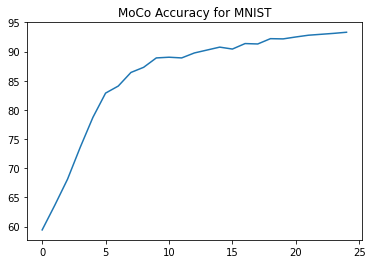

In [ ]:
plt.plot(acc_history)
plt.title("MoCo Accuracy for MNIST")

On choisit les 100 images stratifié

In [ ]:
normalize = transforms.Normalize([0.4914], [0.2023])
val_transform = transforms.Compose([transforms.ToTensor(), normalize])
train_dataset_for_eval = datasets.MNIST(
        "dataset", train=True, download=True, transform=val_transform
    )

train_loader_for_eval = torch.utils.data.DataLoader(
        train_dataset_for_eval,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        pin_memory=True,
        drop_last=False,
    )

test_finish_data = datasets.MNIST(
        "dataset", train=False, download=True, transform=val_transform
    )

test_finish_loader = torch.utils.data.DataLoader(
    test_finish_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    drop_last=True,
)


In [ ]:
def test1(net,test_data_loader):
    net.eval()
    outputs = []
    #accuracy_history = []
    i=0
    with torch.no_grad():
        # loop test data to predict the label by weighted knn search
        test_bar = tqdm(test_data_loader)
        for data, target in test_bar:
            i+=1
            data, target = data.cuda(non_blocking=True), target.cuda(non_blocking=True)
            feature = net(data)
            feature = torch.nn.functional.normalize(feature, dim=1)
            outputs.append(feature)

    
    print(i)
    return  torch.cat(outputs), test_data_loader.dataset.targets

In [ ]:
encoding, Y= test1(
        encQ, train_loader_for_eval
    )

100%|██████████| 235/235 [00:10<00:00, 23.28it/s]

235


In [ ]:
Y.shape

torch.Size([60000])

In [ ]:
#on choisit 100 images labélisé de maniere startifié
from sklearn.model_selection import train_test_split

X_train, _, y_train, _ = train_test_split(encoding, Y, train_size=100,stratify=Y, random_state=42)
y_train =  tf.keras.utils.to_categorical(y_train)
X_train = X_train.cpu().numpy()

In [ ]:
y_train.shape

(100, 10)

In [ ]:
#on definit un DNN pour separer les mnist


In [ ]:
from tensorflow.keras import regularizers
input_shape = (128)
tf.keras.backend.clear_session()
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)),
        layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
          bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 13,066
Trainable params: 13,066
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2)


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 115ms/step - loss: 2.3335 - accuracy: 0.0500 - val_loss: 2.3407 - val_accuracy: 0.0500
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 2.3107 - accuracy: 0.1375 - val_loss: 2.3331 - val_accuracy: 0.1000
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.2919 - accuracy: 0.2000 - val_loss: 2.3253 - val_accuracy: 0.1000
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.2740 - accuracy: 0.3125 - val_loss: 2.3172 - val_accuracy: 0.1000
Epoch 5/1000
3/3 [==============================] - 0s 13ms/step - loss: 2.2563 - accuracy: 0.3750 - val_loss: 2.3090 - val_accuracy: 0.1500
Epoch 6/1000
3/3 [==============================] - 0s 13ms/step - loss: 2.2388 - accuracy: 0.4125 - val_loss: 2.3008 - val_accuracy: 0.2000
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 2.2198 - accuracy: 0.5000 - val_loss: 2.2923 - val_accuracy: 0.2000
Epoch 8/1000
3/3 [=======

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier()

In [ ]:
xgb.fit(X_train, np.argmax(y_train, axis=1))

GradientBoostingClassifier()

In [ ]:
encoding_test, y_test= test1(
        encQ, test_finish_loader
    )

100%|██████████| 39/39 [00:01<00:00, 21.33it/s]

39


In [ ]:
test_finish_loader.dataset.data.shape

torch.Size([10000, 28, 28])

In [ ]:
pred = xgb.predict(encoding_test.cpu())

In [ ]:
pred.shape

(9984,)

In [ ]:
p= tf.keras.utils.to_categorical(y_test)

In [ ]:
p.shape

(10000, 10)

In [ ]:
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(tf.keras.utils.to_categorical(y_test), tf.keras.utils.to_categorical(pred[4:5]))
m.result().numpy()

0.0982

In [ ]:
q=tf.keras.utils.to_categorical(pred)

In [ ]:
q.shape

(9984, 10)